In [1]:
import optuna
import numpy as np
from sklearn.model_selection import cross_val_score,train_test_split
import pandas as pd
from sklearn.ensemble import GradientBoostingRegressor
import math
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_absolute_percentage_error
import matplotlib.pyplot as plt

In [2]:
dir_ = r'C:\Users\zcemg08\DataspellProjects\KTP_test\data\calibration.csv'
df = pd.read_csv(dir_)

df_blank = df[df['Sample']=='Blank']
df_pigment = df[df['Sample']=='S1']

### Data for solvent only
df_blank = df_blank.groupby('Dilution').mean(numeric_only=True)
### data for pigment and solvent
df_pigment = df_pigment.groupby('Dilution').mean(numeric_only=True)
### A values for pigment
df_pigment_train = df_pigment-df_blank.values

1. Find E values for each dilute value (devide A by CL)

In [3]:
WAVELENGTH = np.array([220 + 2*x for x in range(291)])
sensetive_region = np.where((WAVELENGTH>300) &(WAVELENGTH<600))[0]

df_pigment_train = df_pigment_train[df_pigment_train.index<16] ### exclude small dilute values, since their contribution to A total is small and can be obscured by measurments errors

df_pigment_train = df_pigment_train.iloc[:,sensetive_region]
sensetive_waves  = WAVELENGTH[sensetive_region]

In [4]:
df_pigment_train

,Raw Data (Abs Spectrum).41,Raw Data (Abs Spectrum).42,Raw Data (Abs Spectrum).43,Raw Data (Abs Spectrum).44,Raw Data (Abs Spectrum).45,Raw Data (Abs Spectrum).46,Raw Data (Abs Spectrum).47,Raw Data (Abs Spectrum).48,Raw Data (Abs Spectrum).49,Raw Data (Abs Spectrum).50,...,Raw Data (Abs Spectrum).180,Raw Data (Abs Spectrum).181,Raw Data (Abs Spectrum).182,Raw Data (Abs Spectrum).183,Raw Data (Abs Spectrum).184,Raw Data (Abs Spectrum).185,Raw Data (Abs Spectrum).186,Raw Data (Abs Spectrum).187,Raw Data (Abs Spectrum).188,Raw Data (Abs Spectrum).189
Dilution,,,,,,,,,,,,,,,,,,,,,
1,0.155,0.145667,0.136333,0.129333,0.125000,0.123000,0.121000,0.120667,0.121000,0.122333,...,0.062000,0.058333,0.054667,0.052333,0.049667,0.047667,0.047000,0.046000,0.045333,0.043667
2,0.068,0.065000,0.061000,0.058333,0.055667,0.055000,0.054333,0.054000,0.054333,0.056667,...,0.029667,0.027667,0.025667,0.024000,0.023333,0.021667,0.021667,0.020667,0.020000,0.019000
4,0.021,0.020667,0.019667,0.019667,0.019000,0.019333,0.019667,0.020000,0.020667,0.023000,...,0.015333,0.014000,0.012667,0.012667,0.011667,0.011000,0.011000,0.010333,0.009333,0.009333
8,-0.001,0.000000,0.001000,0.001667,0.001667,0.002667,0.003000,0.003667,0.004333,0.006000,...,0.009000,0.008333,0.008000,0.007667,0.006667,0.006667,0.007000,0.006333,0.005333,0.005667


In [5]:
df_pigment_train_e = df_pigment_train.copy()

for i,j in enumerate([1,2,4,8]):
    df_pigment_train_e.values[i,:] =df_pigment_train.values[i,:]/(1*50*2**(-math.log(j,2)))

In [6]:
df_pigment_train_e ## E values now look mostly simillar for all waves numbers

,Raw Data (Abs Spectrum).41,Raw Data (Abs Spectrum).42,Raw Data (Abs Spectrum).43,Raw Data (Abs Spectrum).44,Raw Data (Abs Spectrum).45,Raw Data (Abs Spectrum).46,Raw Data (Abs Spectrum).47,Raw Data (Abs Spectrum).48,Raw Data (Abs Spectrum).49,Raw Data (Abs Spectrum).50,...,Raw Data (Abs Spectrum).180,Raw Data (Abs Spectrum).181,Raw Data (Abs Spectrum).182,Raw Data (Abs Spectrum).183,Raw Data (Abs Spectrum).184,Raw Data (Abs Spectrum).185,Raw Data (Abs Spectrum).186,Raw Data (Abs Spectrum).187,Raw Data (Abs Spectrum).188,Raw Data (Abs Spectrum).189
Dilution,,,,,,,,,,,,,,,,,,,,,
1,0.00310,0.002913,0.002727,0.002587,0.002500,0.002460,0.002420,0.002413,0.002420,0.002447,...,0.001240,0.001167,0.001093,0.001047,0.000993,0.000953,0.000940,0.000920,0.000907,0.000873
2,0.00272,0.002600,0.002440,0.002333,0.002227,0.002200,0.002173,0.002160,0.002173,0.002267,...,0.001187,0.001107,0.001027,0.000960,0.000933,0.000867,0.000867,0.000827,0.000800,0.000760
4,0.00168,0.001653,0.001573,0.001573,0.001520,0.001547,0.001573,0.001600,0.001653,0.001840,...,0.001227,0.001120,0.001013,0.001013,0.000933,0.000880,0.000880,0.000827,0.000747,0.000747
8,-0.00016,0.000000,0.000160,0.000267,0.000267,0.000427,0.000480,0.000587,0.000693,0.000960,...,0.001440,0.001333,0.001280,0.001227,0.001067,0.001067,0.001120,0.001013,0.000853,0.000907


2. Build 4 E models then use average of their prediction in order to lower bias contribution from each experiment

In [7]:
class model_build:
    def __init__(self,X_train,y_train):
        self.X_train = X_train
        self.y_train = y_train

    def gbm_objective(self,trial):
        '''Function evaluates model params on cross validation by negative MSE'''

        learning_rate = trial.suggest_float('learning_rate',0.001,0.5,log=True)
        n_estimators = trial.suggest_int('n_estimators',3,20)
        max_depth = trial.suggest_int('max_depth',2,7)
        subsample = trial.suggest_float('subsample',0.2,0.9)
        m = GradientBoostingRegressor(max_depth=max_depth,n_estimators=n_estimators,learning_rate=learning_rate,subsample=subsample)

        return np.mean(cross_val_score(m,self.X_train,self.y_train,cv=4,n_jobs=2,scoring='neg_mean_squared_error'))

    def find_params(self,objective):
        '''Optimiser looks for model best params by MSE cross val score feedback'''

        study = optuna.create_study(direction="maximize")
        study.optimize(objective, n_trials=50)

        return study.best_params

    def build_model(self):
        '''Function returns optimized sklearn model'''

        model  = GradientBoostingRegressor()
        params = self.find_params(self.gbm_objective)
        model.set_params(**params)
        model.fit(self.X_train,self.y_train)

        return model

In [8]:
### Make 4 splits for each dilute values in order to build 4 E models

X_train1,X_test1, y_train1, y_test1 = train_test_split(np.expand_dims(sensetive_waves,axis=1),df_pigment_train_e.values[0,:],random_state=42,shuffle=True,test_size=0.15)

X_train2,X_test2, y_train2, y_test2 = train_test_split(np.expand_dims(sensetive_waves,axis=1),df_pigment_train_e.values[1,:],random_state=42,shuffle=True,test_size=0.15)

X_train3,X_test3, y_train3, y_test3 = train_test_split(np.expand_dims(sensetive_waves,axis=1),df_pigment_train_e.values[2,:],random_state=42,shuffle=True,test_size=0.15)

X_train4,X_test4, y_train4, y_test4 = train_test_split(np.expand_dims(sensetive_waves,axis=1),df_pigment_train_e.values[3,:],random_state=42,shuffle=True,test_size=0.15)

In [9]:
models = [model_build(X,Y).build_model() for X,Y in zip([X_train1,X_train2,X_train3,X_train4],[y_train1,y_train2,y_train3,y_train4])]

[I 2022-11-05 13:55:59,069] A new study created in memory with name: no-name-e4042d52-7000-4f5e-8e31-51b0447147a5
[I 2022-11-05 13:56:02,180] Trial 0 finished with value: -1.2698982602969464e-05 and parameters: {'learning_rate': 0.06653289063382073, 'n_estimators': 13, 'max_depth': 4, 'subsample': 0.7043202459815108}. Best is trial 0 with value: -1.2698982602969464e-05.
[I 2022-11-05 13:56:02,253] Trial 1 finished with value: -6.111749501262043e-05 and parameters: {'learning_rate': 0.014527925361523605, 'n_estimators': 4, 'max_depth': 6, 'subsample': 0.2835406107150306}. Best is trial 0 with value: -1.2698982602969464e-05.
[I 2022-11-05 13:56:02,325] Trial 2 finished with value: -7.277084648823081e-07 and parameters: {'learning_rate': 0.3559316904987455, 'n_estimators': 14, 'max_depth': 3, 'subsample': 0.7332867057014258}. Best is trial 2 with value: -7.277084648823081e-07.
[I 2022-11-05 13:56:02,399] Trial 3 finished with value: -4.902400894195229e-05 and parameters: {'learning_rate':

3. Check models fit



In [10]:
y_tests = [y_test1,y_test2,y_test3,y_test4]
x_tests = [X_test1,X_test2,X_test3,X_test4]

r2_scores = [r2_score(y_tests[i],models[i].predict(x_tests[i])) for i in range(4)]
mean_percentage_error =  [mean_absolute_percentage_error(y_tests[i],models[i].predict(x_tests[i])) for i in range(4)]

In [11]:
r2_scores ### r2 test score

[0.9939431193312135,
 0.9980173348690267,
 0.9977595220854805,
 0.9955568232040307]

In [12]:
mean_percentage_error ### MAPE test score

[0.05238816401591361,
 0.05069035901497627,
 0.07929761958941446,
 0.06102486834345675]

In [13]:
def predict_E(X):
    '''Function predicts E values by averaging four built models predictions
    x- np.array wavelength, returns E values'''
    return np.mean(np.vstack([m.predict(X) for m in models]),axis=0)

In [14]:
E_vals = predict_E(np.expand_dims(sensetive_waves,axis=1))

4. Check if we can reversly find concentartions by knowing E_vals on train set
   c = A/E*L  ideal result all c values must be the same

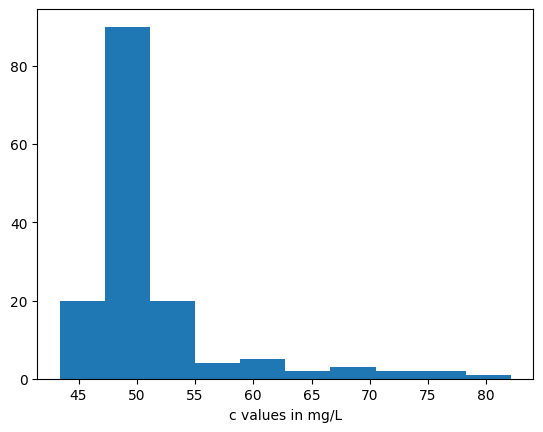

In [15]:
### Dilute 1

plt.hist(df_pigment_train.values[0,:]/E_vals)
plt.xlabel('c values in mg/L')
plt.show()

In [16]:
(df_pigment_train.values[0,:]/E_vals).mean()

51.36563219401605

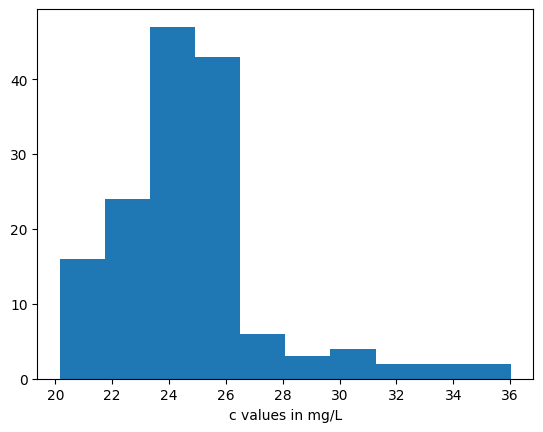

In [17]:
### Dilute 2

plt.hist(df_pigment_train.values[1,:]/E_vals)
plt.xlabel('c values in mg/L')
plt.show()

In [18]:
np.mean(df_pigment_train.values[1,:]/E_vals)

24.6872932752032

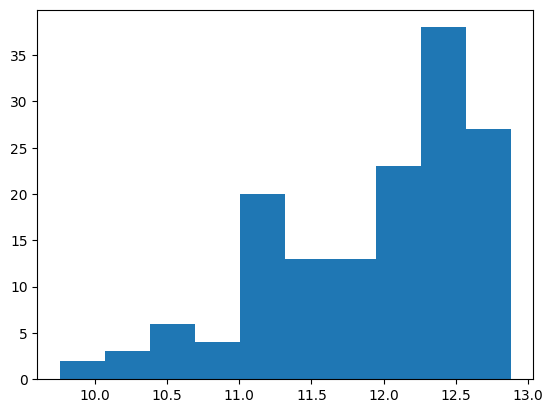

In [19]:
# dilute 4

plt.hist(df_pigment_train.values[2,:]/E_vals)
plt.show()

In [20]:
np.mean(df_pigment_train.values[2,:]/E_vals)

11.920359255531583

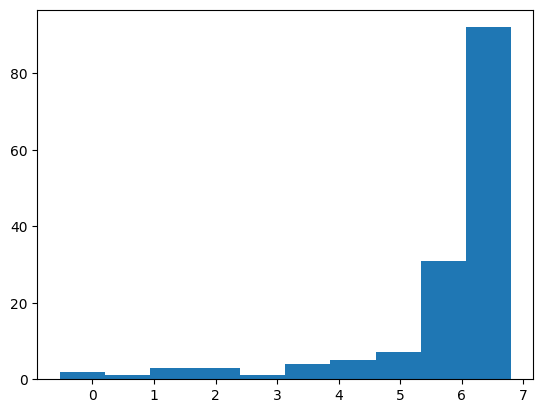

In [21]:
# dilute 8

plt.hist(df_pigment_train.values[3,:]/E_vals)
plt.show()

In [22]:
np.mean(df_pigment_train.values[3,:]/E_vals)

5.719592514873219

Conclusion

Looks the mean in c values corresponds to dilute values, however somehow there is large deviation in the results, c should be constant

Therefore on test set mean of c values for different waves will be taken

 4.A

In [24]:
df_test = pd.read_csv(r'C:\Users\zcemg08\DataspellProjects\KTP_test\data\sample.csv')

In [25]:
df_test_SOLVENT = df_test[df_test['Sample']=='Blank'].groupby('Dilution').mean(numeric_only=True) ### average experiment readings
df_test_mix     = df_test[(df_test['Sample']=='X1')].groupby('Dilution').mean(numeric_only=True)

In [26]:
### Select data for sensetive waves only

In [27]:
df_test_SOLVENT = df_test_SOLVENT.iloc[:,sensetive_region]
df_test_mix     = df_test_mix.iloc[:,sensetive_region]

In [28]:
df_pigment_a_test = df_test_mix - df_test_SOLVENT.values  ### A values for pigment in test set

In [29]:
np.mean(df_pigment_a_test.values/E_vals)

162.13001130055463

Check if the result makes sense

(A1/A2 = c1/c2)

In [30]:
x = df_pigment_train.values[0,:] ### A of pigment at 50 mg/L
y = df_pigment_a_test.values[0,:] ### A of pigment

In [31]:
np.mean(y/x)

2.9170571167171553

In [33]:
162/50

3.24

Results is not rediculus